# Task 1 : Prediction using Supervised Machine Learning
# GRIP @ The Sparks Foundation
# Author : DEVANSH SHRIVASTAVA

## Linear Regression

**In this regression task I tried to predict the percentage of marks that a student is expected to score based upon the number of hours they studied.**

**This is a simple linear regression task as it involves just two variables.**

## Problem Statement

**Predict the percentage of an student based on the no. of study hours.** 

**What will be predicted score if a student studies for 9.25 hrs/ day?**

# Importing The Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# to suppress warnings
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Step 1 - Reading and Understanding Data

In [2]:
data='https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df=pd.read_csv(data)
print('Data Imported successfully')
df.head()

Data Imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.shape # There are 25 obsevations and 2 features present

(25, 2)

In [4]:
df.info() # No null values present in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:**

# Step 2 - Input Data Visualization

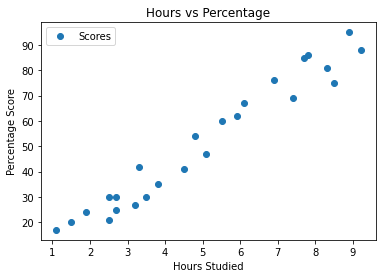

In [6]:
# Plotting the distribution of score
df.plot(x='Hours',y='Scores',style='o')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

#### From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

Skewness : 0.1903382010052985


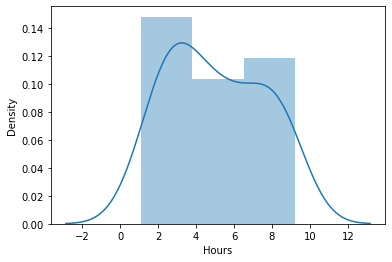

Skewness : 0.2339646665397317


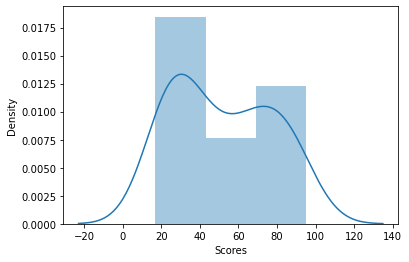

In [7]:
for i in df.columns:
    sns.distplot(df[i])
    print('Skewness :',df[i].skew())
    plt.show()

**There is very small right skew which is acceptable. Higher the magnitude of the co-efficient of skewness indicates that the distribution is highly differ from the normal distribution**

## Step 3 - Data Preprocessing

**This step involved division of data into "attributes" (inputs) and "labels" (outputs).**

In [8]:
X=df.iloc[:,:-1].values
y=df.iloc[:,1].values

**Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:**

# Step 4 - Model Training

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('Shape of data \n')
print('X_train shape :',X_train.shape)
print('X_test shape :',X_test.shape)
print('y_train shape :',y_train.shape)
print('y_test shape :',y_test.shape)

Shape of data 

X_train shape : (20, 1)
X_test shape : (5, 1)
y_train shape : (20,)
y_test shape : (5,)


In [10]:
lr=LinearRegression()
lr.fit(X_train,y_train)
print('Training Completed')

Training Completed


# Step 5 - Plotting the Line of regression
**Now since our model is trained now, its the time to visualize the best-fit line of regression.**

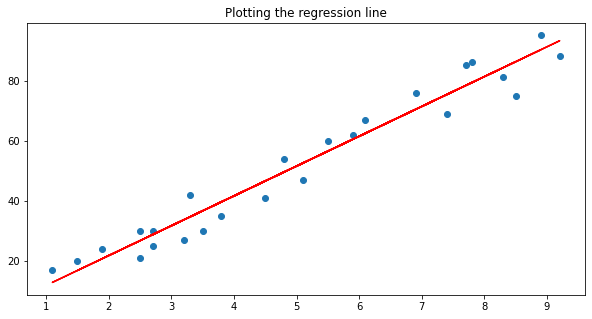

In [11]:
# Plotting the regression line
line=lr.coef_*X+lr.intercept_

# Plotting for the test data
plt.figure(figsize=(10,5))
plt.scatter(X,y)
plt.plot(X,line,color='r')
plt.title('Plotting the regression line')
plt.show()

# Step 6 - Making Predictions

**Now that we have trained our algorithm, it's time to test the model by making some predictions.
For this we will use our test-set data**

In [12]:
# Testing data
print('Testing data \n',X_test)

# Model Prediction
y_pred=lr.predict(X_test)
print('\n Predicted values :\n')
print(y_pred)

Testing data 
 [[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]

 Predicted values :

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


# Step 7 - Comparing Actual result to the Predicted Model result

In [13]:
# Comparing Actual vs Predicted

df1=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df1

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [14]:
# Estimate training and test score

print('Training score',lr.score(X_train,y_train))
print('Test score',lr.score(X_test,y_test))

Training score 0.9515510725211552
Test score 0.9454906892105356


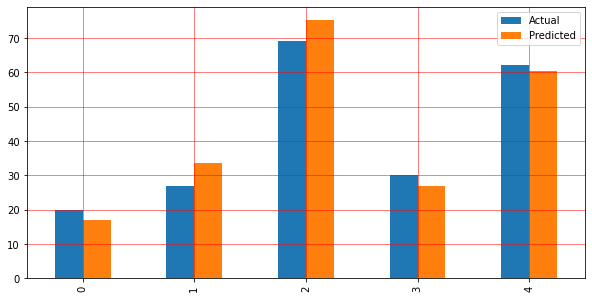

In [15]:
# Plotting the Bar graph to depict the difference between the actual and predicted value

df1.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linewidth='0.5', color='red')
plt.grid(which='minor', linewidth='0.5', color='blue')
plt.show()

In [16]:
# Now predicting the percentage score if a student studies for 9.25 hrs/ day

In [17]:
hrs=np.array(9.25).reshape(-1,1)
hrs_pred=lr.predict(hrs)
print('No : of hours the student studied :{}'.format(hrs[0,0]))
print('Predicted Score if a student studies for 9.25 hrs/day :{}'.format(hrs_pred[0]))

No : of hours the student studied :9.25
Predicted Score if a student studies for 9.25 hrs/day :93.69173248737538


### If a student studies for 9.25 hours/per , the student is expected to get 93.69 percentage

# Step 8 - Evaluating the model

**Model Evaluation is an integral part of the model development process. It helps to find the best model that represents our data and how well the chosen model will work in the future. For Evaluating the model we can caluculate R Squared, RMSE and MAE.**

In [18]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [19]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
print('R Squared :',r2_score(y_test,y_pred))
print('Mean absolute error :',mae)
print('Mean squared error :',mse)
print('Root Mean Squared Error :',np.sqrt(mse))

R Squared : 0.9454906892105356
Mean absolute error : 4.183859899002975
Mean squared error : 21.5987693072174
Root Mean Squared Error : 4.6474476121003665


**R-2 gives the score of model fit and in this case we have R-2 = 0.9454906892105355 which is actually a great score for this model.**


##  Conclusion

### I was successfully able to carry-out Prediction using Supervised ML task and was able to evaluate the model's performance on various parameters.

# Thank You